# The work in this notebook is development based off of the SOTA for facial emotion recognition "hsemotion".
### github link: https://github.com/HSE-asavchenko/face-emotion-recognition

- Author: Ankita Jaswal

In [ ]:
# dependencies
%env CUDA_VISIBLE_DEVICES=0

env: CUDA_VISIBLE_DEVICES=0


In [ ]:
!pip install hsemotion

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 8.5 MB/s eta 0:00:00
  Created wheel for hsemotion: filename=hsemotion-0.3.0-py3-none-any.whl size=11242 sha256=470f74ca052783830ec84bfbec9ded82039e97df4a90c145ad4fd7526cef8ebe
  Stored in directory: /root/.cache/pip/wheels/38/88/e0/3b365122443c2ec55f3e058f2b7ad59df7b5e302c457c4539a
Successfully built hsemotion


In [1]:
# imports
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import torch
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import time

%matplotlib inline

In [2]:
print(torch.__version__)

2.1.0+cu118


# Preprocess data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load data
data_path = "/content/drive/Shareddrives/CMPE 258 - Deep Learning Project/Datasets/test"

# Use pretrained model to evaluate on own data

1.  using hsemotion pre-trained model
2.  using own dataset which combines extracted faces from emotic dataset and FER dataset.



In [ ]:
# load model
from hsemotion.facial_emotions import HSEmotionRecognizer
model_name='enet_b2_8'
fer=HSEmotionRecognizer(model_name=model_name,device='cuda') # device is cpu or gpu

/root/.hsemotion/enet_b2_8.pt Compose(
    Resize(size=(260, 260), interpolation=bilinear, max_size=None, antialias=warn)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)


In [ ]:
predictions = []
actuals = []
total_prediction_time = 0  # To accumulate the time taken for predictions

# Mapping of folder names to model's expected labels
folder_to_label = {
    'angry': 'Anger',
    'disgust': 'Disgust',
    'fear': 'Fear',
    'happy': 'Happiness',
    'neutral': 'Neutral',
    'sad': 'Sadness',
    'surprise': 'Surprise'
}

for emotion_folder in os.listdir(data_path):
    emotion_path = os.path.join(data_path, emotion_folder)
    if os.path.isdir(emotion_path):
        #counter = 0
        for img_file in os.listdir(emotion_path):
            #if counter < 5:  # Process only the first 5 images
                img_path = os.path.join(emotion_path, img_file)
                frame_bgr = cv2.imread(img_path)
                frame = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)

                start_time = time.time()  # Start timing

                # Predict emotion
                emotion_pred, scores = fer.predict_emotions(frame, logits=True)

                end_time = time.time()  # End timing
                prediction_time = end_time - start_time
                total_prediction_time += prediction_time

                predictions.append(emotion_pred)
                actuals.append(folder_to_label[emotion_folder])

               # counter += 1
            #else:
              #  break  # Move to the next directory after processing 5 images
print(f"Total prediction time for 5 samples from each category: {total_prediction_time:.2f} seconds")

Total prediction time for 5 samples from each category: 246.25 seconds


In [ ]:
# Calculate Accuracy
accuracy = accuracy_score(actuals, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 52.59%


# enet-b2-8

Accuracy: 52.59%


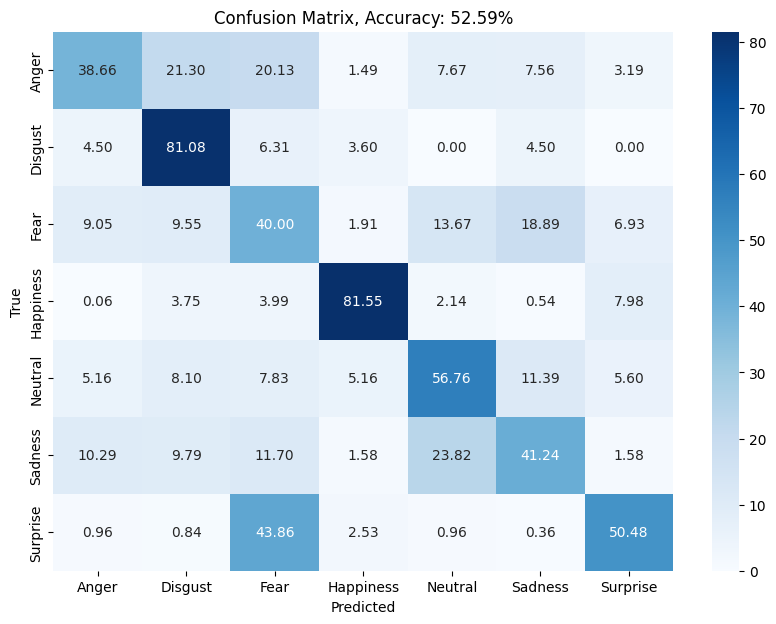

ValueError: ignored

In [ ]:
# Convert idx_to_class to a list of labels
idx_to_class = {0: 'Anger', 1: 'Disgust', 2: 'Fear', 3: 'Happiness', 4: 'Neutral', 5: 'Sadness', 6: 'Surprise'}
emotion_labels = [idx_to_class[idx] for idx in sorted(idx_to_class.keys())]

# Calculate the Confusion Matrix
cm = confusion_matrix(actuals, predictions, labels=emotion_labels)

# Normalize the Confusion Matrix to show percentages
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_normalized *= 100  # Convert to percentage

# Calculate and Display Accuracy
accuracy = accuracy_score(actuals, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Plot the Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix, Accuracy: {accuracy * 100:.2f}%')
plt.show()


# Display the Classification Report
print(classification_report(actuals, predictions, target_names=emotion_labels))

#enet-b0-8-va-mtl

Accuracy: 56.49%


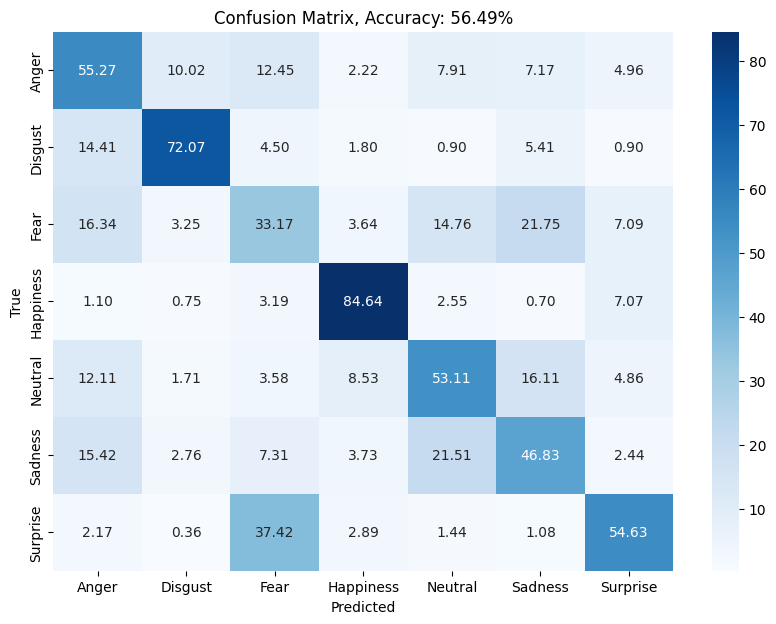

ValueError: ignored

In [ ]:
# Convert idx_to_class to a list of labels
idx_to_class = {0: 'Anger', 1: 'Disgust', 2: 'Fear', 3: 'Happiness', 4: 'Neutral', 5: 'Sadness', 6: 'Surprise'}
emotion_labels = [idx_to_class[idx] for idx in sorted(idx_to_class.keys())]

# Calculate the Confusion Matrix
cm = confusion_matrix(actuals, predictions, labels=emotion_labels)

# Normalize the Confusion Matrix to show percentages
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_normalized *= 100  # Convert to percentage

# Calculate and Display Accuracy
accuracy = accuracy_score(actuals, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Plot the Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix, Accuracy: {accuracy * 100:.2f}%')
plt.show()


# Display the Classification Report
print(classification_report(actuals, predictions, target_names=emotion_labels))

# enet_b0_8_best_afew

Accuracy: 55.45%


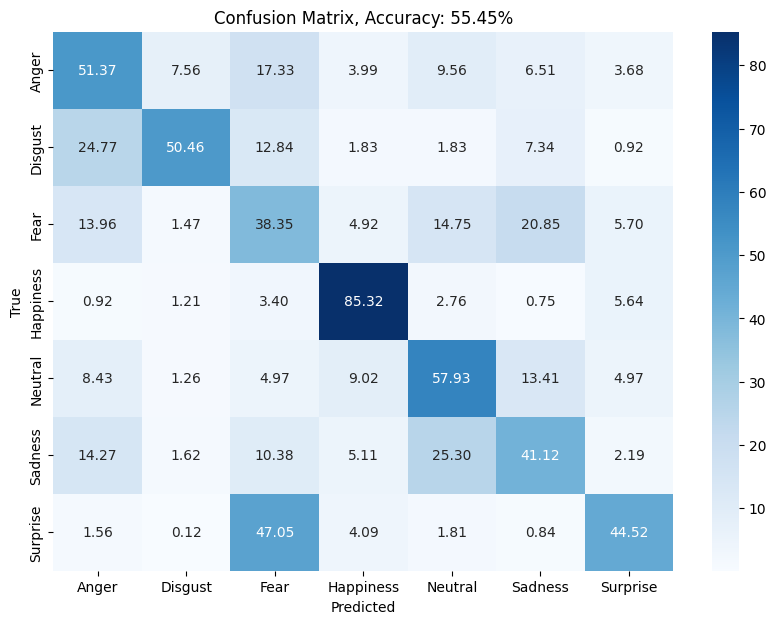

ValueError: ignored

In [ ]:
# Convert idx_to_class to a list of labels
idx_to_class = {0: 'Anger', 1: 'Disgust', 2: 'Fear', 3: 'Happiness', 4: 'Neutral', 5: 'Sadness', 6: 'Surprise'}
emotion_labels = [idx_to_class[idx] for idx in sorted(idx_to_class.keys())]

# Calculate the Confusion Matrix
cm = confusion_matrix(actuals, predictions, labels=emotion_labels)

# Normalize the Confusion Matrix to show percentages
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_normalized *= 100  # Convert to percentage

# Calculate and Display Accuracy
accuracy = accuracy_score(actuals, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Plot the Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix, Accuracy: {accuracy * 100:.2f}%')
plt.show()


# Display the Classification Report
print(classification_report(actuals, predictions, target_names=emotion_labels))

# ENET_V2_7

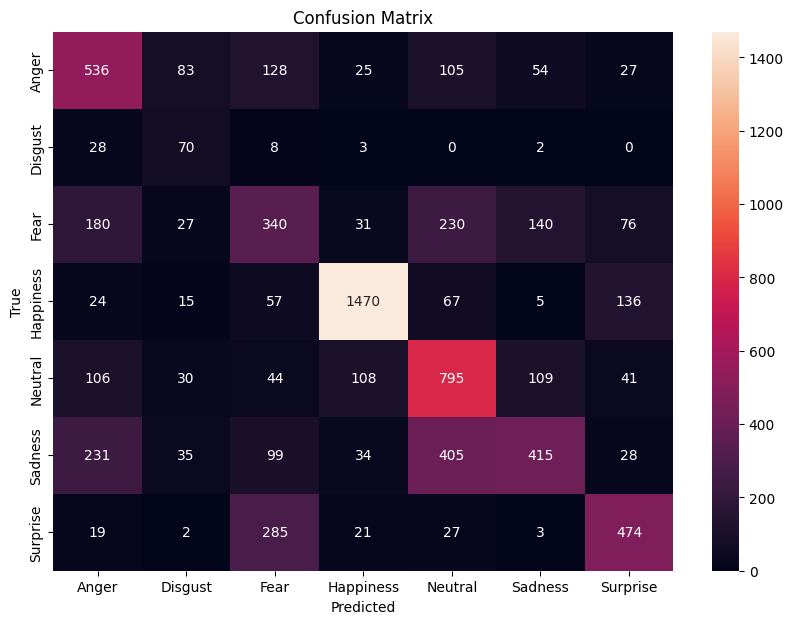

Accuracy: 57.12%
              precision    recall  f1-score   support

       Anger       0.48      0.56      0.51       958
     Disgust       0.27      0.63      0.38       111
        Fear       0.35      0.33      0.34      1024
   Happiness       0.87      0.83      0.85      1774
     Neutral       0.49      0.64      0.56      1233
     Sadness       0.57      0.33      0.42      1247
    Surprise       0.61      0.57      0.59       831

    accuracy                           0.57      7178
   macro avg       0.52      0.56      0.52      7178
weighted avg       0.59      0.57      0.57      7178



In [ ]:
# Convert idx_to_class to a list of labels
idx_to_class = {0: 'Anger', 1: 'Disgust', 2: 'Fear', 3: 'Happiness', 4: 'Neutral', 5: 'Sadness', 6: 'Surprise'}
emotion_labels = [idx_to_class[idx] for idx in sorted(idx_to_class.keys())]

# Calculate and Display the Confusion Matrix
cm = confusion_matrix(actuals, predictions, labels=emotion_labels)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Calculate Accuracy
accuracy = accuracy_score(actuals, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Display the Classification Report
print(classification_report(actuals, predictions, target_names=emotion_labels))


Accuracy: 57.12%


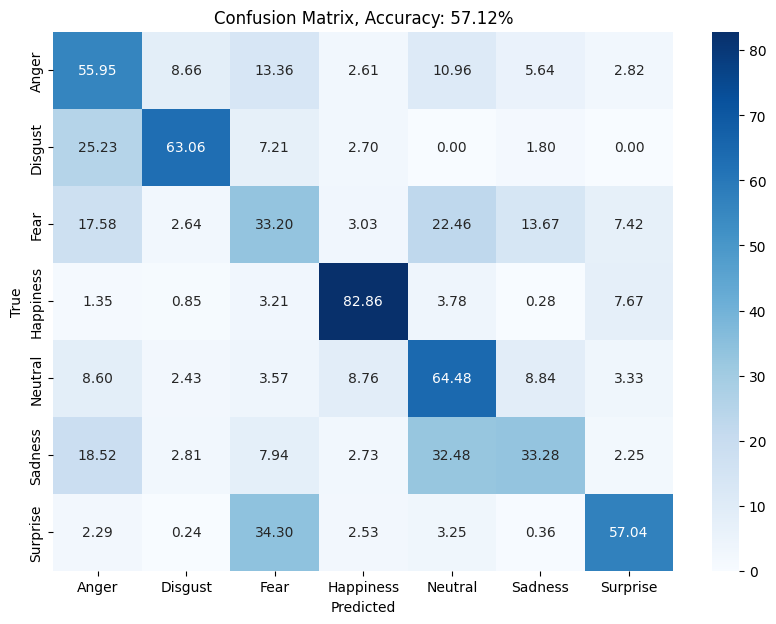

              precision    recall  f1-score   support

       Anger       0.48      0.56      0.51       958
     Disgust       0.27      0.63      0.38       111
        Fear       0.35      0.33      0.34      1024
   Happiness       0.87      0.83      0.85      1774
     Neutral       0.49      0.64      0.56      1233
     Sadness       0.57      0.33      0.42      1247
    Surprise       0.61      0.57      0.59       831

    accuracy                           0.57      7178
   macro avg       0.52      0.56      0.52      7178
weighted avg       0.59      0.57      0.57      7178



In [ ]:
# Convert idx_to_class to a list of labels
idx_to_class = {0: 'Anger', 1: 'Disgust', 2: 'Fear', 3: 'Happiness', 4: 'Neutral', 5: 'Sadness', 6: 'Surprise'}
emotion_labels = [idx_to_class[idx] for idx in sorted(idx_to_class.keys())]

# Calculate the Confusion Matrix
cm = confusion_matrix(actuals, predictions, labels=emotion_labels)

# Normalize the Confusion Matrix to show percentages
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_normalized *= 100  # Convert to percentage

# Calculate and Display Accuracy
accuracy = accuracy_score(actuals, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Plot the Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix, Accuracy: {accuracy * 100:.2f}%')
plt.show()


# Display the Classification Report
print(classification_report(actuals, predictions, target_names=emotion_labels))


# using mobilenet

In [ ]:
import os
import time
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet import preprocess_input


In [ ]:
model=load_model('/content/drive/Shareddrives/CMPE 258 - Deep Learning Project/HSemotion Model/mobilenet_7.h5')
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_pad (ZeroPadding2D)   (None, 225, 225, 3)       0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                         

In [ ]:
INPUT_SIZE = (224, 224)  # MobileNet typical input size
idx_to_class = {0: 'Anger', 1: 'Disgust', 2: 'Fear', 3: 'Happiness', 4: 'Neutral', 5: 'Sadness', 6: 'Surprise'}

In [ ]:
predictions = []
actuals = []
total_prediction_time = 0

# Mapping of folder names to model's expected labels
folder_to_label = {
    'angry': 'Anger',
    'disgust': 'Disgust',
    'fear': 'Fear',
    'happy': 'Happiness',
    'neutral': 'Neutral',
    'sad': 'Sadness',
    'surprise': 'Surprise'
}


for emotion_folder in os.listdir(data_path):
    emotion_path = os.path.join(data_path, emotion_folder)
    if os.path.isdir(emotion_path):
        counter = 0
        for img_file in os.listdir(emotion_path):
            if counter < 5:
                img_path = os.path.join(emotion_path, img_file)
                frame_bgr = cv2.imread(img_path)
                frame = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)

                # Resize and preprocess the image for MobileNet
                resized_frame = cv2.resize(frame, INPUT_SIZE)
                inp = preprocess_input(resized_frame)
                inp = np.expand_dims(inp, axis=0)

                start_time = time.time()

                # Predict emotion
                scores = model.predict(inp)
                emotion_pred = idx_to_class[np.argmax(scores)]

                end_time = time.time()
                prediction_time = end_time - start_time
                total_prediction_time += prediction_time

                predictions.append(emotion_pred)
                actuals.append(folder_to_label[emotion_folder])

                counter += 1
            else:
                break

print(f"Total prediction time for 5 samples from each category: {total_prediction_time:.2f} seconds")


1/1 [==============================] - 0s 29ms/step
Total prediction time for 5 samples from each category: 4.94 seconds


In [ ]:
# Calculate Accuracy
accuracy = accuracy_score(actuals, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 14.29%


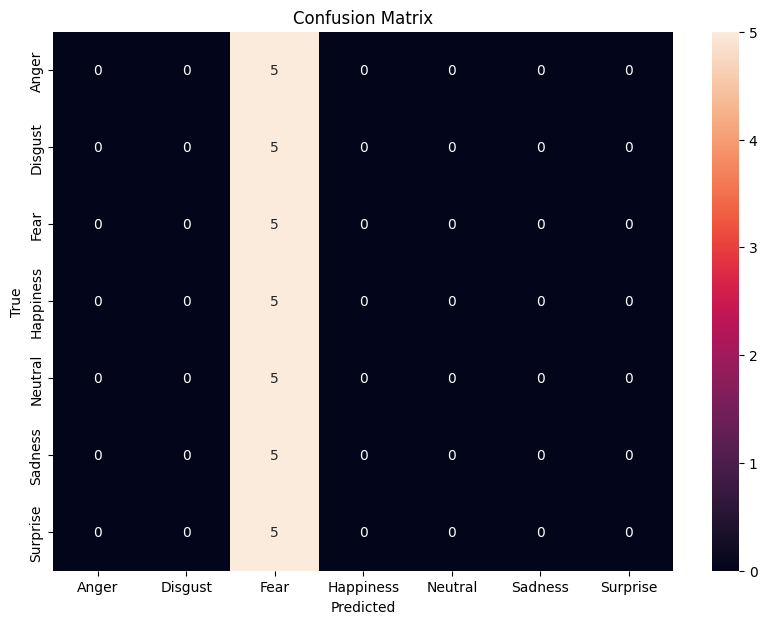

Accuracy: 14.29%
              precision    recall  f1-score   support

       Anger       0.00      0.00      0.00         5
     Disgust       0.00      0.00      0.00         5
        Fear       0.14      1.00      0.25         5
   Happiness       0.00      0.00      0.00         5
     Neutral       0.00      0.00      0.00         5
     Sadness       0.00      0.00      0.00         5
    Surprise       0.00      0.00      0.00         5

    accuracy                           0.14        35
   macro avg       0.02      0.14      0.04        35
weighted avg       0.02      0.14      0.04        35



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Convert idx_to_class to a list of labels
idx_to_class = {0: 'Anger', 1: 'Disgust', 2: 'Fear', 3: 'Happiness', 4: 'Neutral', 5: 'Sadness', 6: 'Surprise'}
emotion_labels = [idx_to_class[idx] for idx in sorted(idx_to_class.keys())]

# Calculate and Display the Confusion Matrix
cm = confusion_matrix(actuals, predictions, labels=emotion_labels)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Calculate Accuracy
accuracy = accuracy_score(actuals, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Display the Classification Report
print(classification_report(actuals, predictions, target_names=emotion_labels))

# Add layer of face detector using MTCNN and then apply efficientNet and MobileNet

In [ ]:
!pip install facenet-pytorch


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 28.6 MB/s eta 0:00:00


In [ ]:
from facenet_pytorch import MTCNN
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'
mtcnn = MTCNN(keep_all=False, post_process=False, min_face_size=40, device=device)

In [ ]:
def detect_face(frame):
    bounding_boxes, probs = mtcnn.detect(frame, landmarks=False)
    if bounding_boxes is not None:
        bounding_boxes = bounding_boxes[probs > 0.9]  # Filter out faces with low probability
    return bounding_boxes


In [ ]:
import cv2
import os
import time

predictions = []
actuals = []
total_prediction_time = 0

# Mapping of folder names to model's expected labels
folder_to_label = {
    'angry': 'Anger',
    'disgust': 'Disgust',
    'fear': 'Fear',
    'happy': 'Happiness',
    'neutral': 'Neutral',
    'sad': 'Sadness',
    'surprise': 'Surprise'
}


for emotion_folder in os.listdir(data_path):
    emotion_path = os.path.join(data_path, emotion_folder)
    if os.path.isdir(emotion_path):
        counter = 0
        for img_file in os.listdir(emotion_path):
            if counter < 5:
                img_path = os.path.join(emotion_path, img_file)
                frame_bgr = cv2.imread(img_path)
                frame_rgb = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)

                # Detect faces (assuming one face per image)
                bounding_boxes, _ = mtcnn.detect(frame_rgb)
                if bounding_boxes is not None:
                    for bbox in bounding_boxes:
                        box = bbox.astype(int)
                        x1, y1, x2, y2 = box[0:4]

                        # Validate coordinates
                        x1, y1 = max(0, x1), max(0, y1)
                        x2, y2 = min(frame_rgb.shape[1], x2), min(frame_rgb.shape[0], y2)

                        if x1 >= x2 or y1 >= y2:
                            # Skip this image as the face box is invalid
                            continue

                        face_img = frame_rgb[y1:y2, x1:x2]

                        start_time = time.time()

                        # Predict emotion
                        emotion_pred, scores = fer.predict_emotions(face_img, logits=True)

                        end_time = time.time()
                        prediction_time = end_time - start_time
                        total_prediction_time += prediction_time

                        predictions.append(emotion_pred)
                        actuals.append(folder_to_label[emotion_folder])

                        counter += 1
                        if counter >= 5:
                            break
                else:
                    # No face detected, skip this image
                    continue
            else:
                break

print(f"Total prediction time for 5 samples from each category: {total_prediction_time:.2f} seconds")


Total prediction time for 5 samples from each category: 2.40 seconds


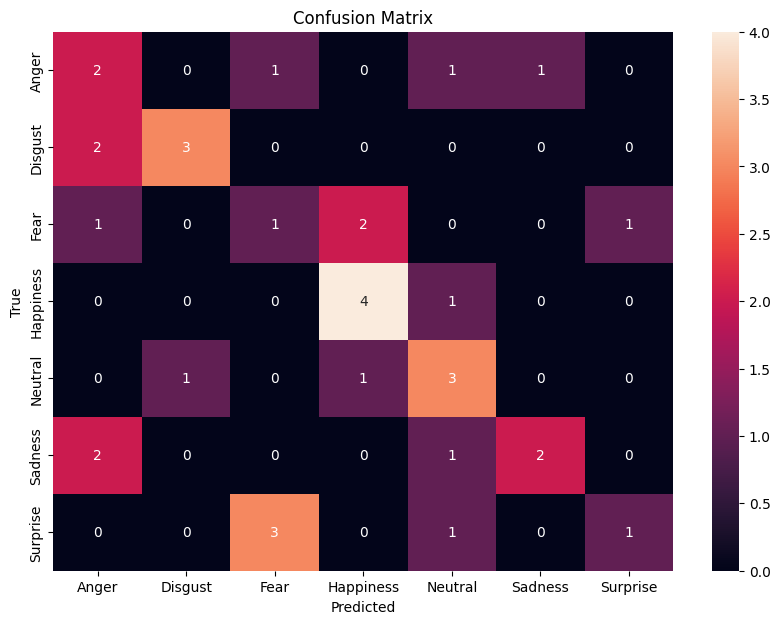

Accuracy: 45.71%
              precision    recall  f1-score   support

       Anger       0.29      0.40      0.33         5
     Disgust       0.75      0.60      0.67         5
        Fear       0.20      0.20      0.20         5
   Happiness       0.57      0.80      0.67         5
     Neutral       0.43      0.60      0.50         5
     Sadness       0.67      0.40      0.50         5
    Surprise       0.50      0.20      0.29         5

    accuracy                           0.46        35
   macro avg       0.49      0.46      0.45        35
weighted avg       0.49      0.46      0.45        35



In [ ]:
# Convert idx_to_class to a list of labels
idx_to_class = {0: 'Anger', 1: 'Disgust', 2: 'Fear', 3: 'Happiness', 4: 'Neutral', 5: 'Sadness', 6: 'Surprise'}
emotion_labels = [idx_to_class[idx] for idx in sorted(idx_to_class.keys())]

# Calculate and Display the Confusion Matrix
cm = confusion_matrix(actuals, predictions, labels=emotion_labels)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Calculate Accuracy
accuracy = accuracy_score(actuals, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Display the Classification Report
print(classification_report(actuals, predictions, target_names=emotion_labels))

#mobilenet with mtcnn

In [ ]:
import os
import cv2
import numpy as np
import time
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet import preprocess_input

In [ ]:
def mobilenet_preprocess_input(x, **kwargs):
    x[..., 0] -= 103.939
    x[..., 1] -= 116.779
    x[..., 2] -= 123.68
    return x

In [ ]:
INPUT_SIZE = (224, 224)
idx_to_class = {0: 'Anger', 1: 'Disgust', 2: 'Fear', 3: 'Happiness', 4: 'Neutral', 5: 'Sadness', 6: 'Surprise'}


In [ ]:
!pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 9.3 MB/s eta 0:00:00


In [ ]:
from mtcnn import MTCNN
import cv2

# Initialize the MTCNN detector
detector = MTCNN()

# Load an image
image = cv2.imread('/content/drive/Shareddrives/CMPE 258 - Deep Learning Project/Datasets/train_data/surprise/0_6burh2fms2a508h4vu.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Detect faces in the image
faces = detector.detect_faces(image_rgb)

for face in faces:
    print(face)


1/1 [==============================] - 0s 168ms/step


1/1 [==============================] - 0s 239ms/step
{'box': [3, 7, 55, 74], 'confidence': 0.9983946681022644, 'keypoints': {'left_eye': (16, 35), 'right_eye': (42, 33), 'nose': (29, 45), 'mouth_left': (20, 63), 'mouth_right': (43, 60)}}


In [ ]:
import cv2
import os
import time

predictions = []
actuals = []
total_prediction_time = 0

detector = MTCNN()

# Mapping of folder names to model's expected labels
folder_to_label = {
    'angry': 'Anger',
    'disgust': 'Disgust',
    'fear': 'Fear',
    'happy': 'Happiness',
    'neutral': 'Neutral',
    'sad': 'Sadness',
    'surprise': 'Surprise'
}


for emotion_folder in os.listdir(data_path):
    emotion_path = os.path.join(data_path, emotion_folder)
    if os.path.isdir(emotion_path):
        counter = 0
        for img_file in os.listdir(emotion_path):
            if counter < 10:
                img_path = os.path.join(emotion_path, img_file)
                frame_bgr = cv2.imread(img_path)
                frame_rgb = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)

                 # Detect faces
                detections = detector.detect_faces(frame_rgb)
                for detection in detections:
                    x, y, width, height = detection['box']
                    face_img = frame_rgb[y:y+height, x:x+width]


                    # Resize and preprocess the face image for MobileNet
                    resized_frame = cv2.resize(face_img, INPUT_SIZE)
                    inp = preprocess_input(resized_frame)
                    inp = np.expand_dims(inp, axis=0)

                    start_time = time.time()

                    # Predict emotion
                    scores = model.predict(inp)
                    emotion_pred = idx_to_class[np.argmax(scores)]

                    end_time = time.time()
                    prediction_time = end_time - start_time
                    total_prediction_time += prediction_time

                    predictions.append(emotion_pred)
                    actuals.append(folder_to_label[emotion_folder])

                    counter += 1
                    if counter >= 10:
                        break
                else:
                    # No face detected, skip this image
                    continue
            else:
                break

print(f"Total prediction time for 5 samples from each category: {total_prediction_time:.2f} seconds")


1/1 [==============================] - 0s 21ms/step
Total prediction time for 5 samples from each category: 4.98 seconds


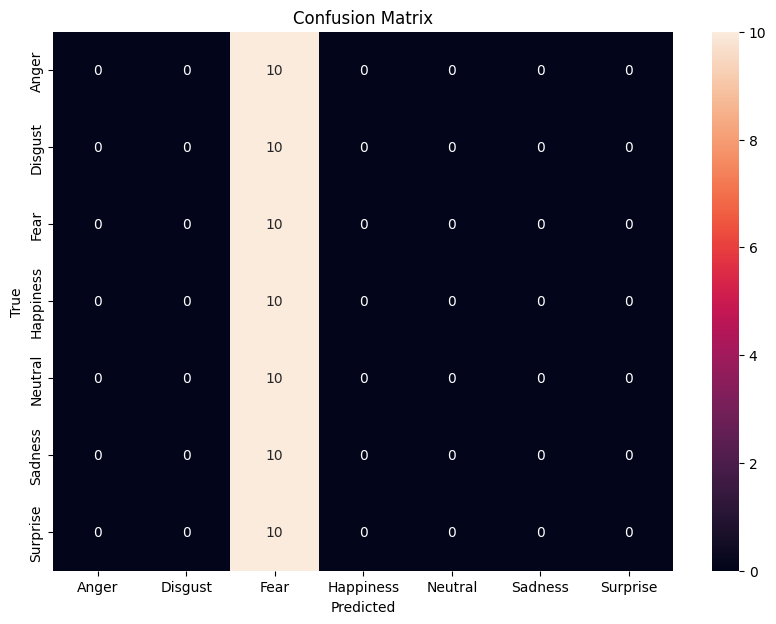

Accuracy: 14.29%
              precision    recall  f1-score   support

       Anger       0.00      0.00      0.00        10
     Disgust       0.00      0.00      0.00        10
        Fear       0.14      1.00      0.25        10
   Happiness       0.00      0.00      0.00        10
     Neutral       0.00      0.00      0.00        10
     Sadness       0.00      0.00      0.00        10
    Surprise       0.00      0.00      0.00        10

    accuracy                           0.14        70
   macro avg       0.02      0.14      0.04        70
weighted avg       0.02      0.14      0.04        70



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Convert idx_to_class to a list of labels
idx_to_class = {0: 'Anger', 1: 'Disgust', 2: 'Fear', 3: 'Happiness', 4: 'Neutral', 5: 'Sadness', 6: 'Surprise'}
emotion_labels = [idx_to_class[idx] for idx in sorted(idx_to_class.keys())]

# Calculate and Display the Confusion Matrix
cm = confusion_matrix(actuals, predictions, labels=emotion_labels)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Calculate Accuracy
accuracy = accuracy_score(actuals, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Display the Classification Report
print(classification_report(actuals, predictions, target_names=emotion_labels))


# Results

1.   Evaluating EfficientNet using no face detector vs. using MTCNN as the face detector didn't make a huge difference, final accuracy ended up being 46%.
2.   Since the source doesn't provide preprocessing steps they have taken for MobileNet, it generalized really poorly on our dataset, it was biased towards class "Fear".

3. Therefore, final model to use would be EfficientNet as it provides moderate inference time, Good all-around performance on various datasets including our own, and is suitable for applications where a balance between accuracy and inference time is needed.



In [ ]:

import pandas as pd

# Create a table with two columns and 5 rows
table = pd.DataFrame(columns=['Model', 'Accuracy (%)'])

# Fill out the table with your own values
table.loc[0] = ['EfficientNet AFew', 45.71]
table.loc[1] = ['EfficientNet VGAF', 54.29]
table.loc[2] = ['EfficientNet VA_MTL', 57.14]
table.loc[3] = ['EfficientNet V2 8', 42.86]
table.loc[4] = ['EfficientNet V2 7', 54.29]

# Print the table
print(table)


                 Model  Accuracy (%)
0    EfficientNet AFew         45.71
1    EfficientNet VGAF         54.29
2  EfficientNet VA_MTL         57.14
3    EfficientNet V2 8         42.86
4    EfficientNet V2 7         54.29
